In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from general_mm import GeneralizedMixtureModel, ModuledDistribution
import torch
from torch import nn
from torch.distributions import MultivariateNormal
plt.style.use('ggplot')

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

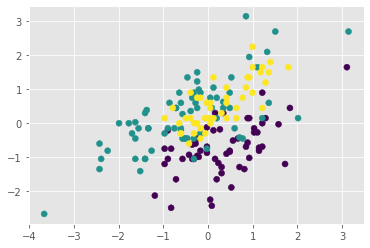

In [189]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine)

learn_data = torch.tensor(wine.data).to(torch.float32)
learn_data = (learn_data - learn_data.mean(dim=0)) / learn_data.std(dim=0)
plt.scatter(learn_data[:, 2], learn_data[:, 3], c=wine.target)

In [190]:
cluster_num = 3

parameters = [{"loc": nn.Parameter(torch.randn(13)), "scale_tril": nn.Parameter(torch.eye(13))} for k in range(cluster_num)]
distributions = [ModuledDistribution(MultivariateNormal(**parameters[k]),
                                     parameters[k])
                 for k in range(cluster_num)]
model = GeneralizedMixtureModel(distributions, rtol=1e-8)

In [191]:
print(parameters[2])

{'loc': Parameter containing:
tensor([-0.2752, -2.2068,  1.7038, -0.3220, -0.1899, -0.1967,  0.6636, -1.1025,
        -0.5653, -1.0791, -0.9919, -0.8559, -0.6601], requires_grad=True), 'scale_tril': Parameter containing:
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.

In [192]:
model.fit(learn_data)

  4%|▍         | 44/1000 [00:21<07:45,  2.05it/s, log_prob=tensor(-2223.6138)]


NotImplementedError: 

In [ ]:
predicted = model.predict(learn_data)
color = predicted.argmax(dim=0)
print(color)
plt.scatter(learn_data[:, 2], learn_data[:, 3], c=color)
for k in range(cluster_num):
    sample = distributions[k].sample([100])[:, (2, 3)]
    plt.scatter(sample[:, 0], sample[:, 1], s=1., alpha=0.3)

In [ ]:
print(distributions[1].parameter["loc"])

In [130]:
print(model.cluster_ratio)


tensor([0.0000, 0.3333, 0.6667])
